In [1]:
# Predicting Survival in the Titanic Data Set
# We will be using a decision tree to make predictions about the Titanic data set from
# Kaggle. This data set provides information on the Titanic passengers and can be used to
# predict whether a passenger survived or not.

# You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
# and Fare to predict whether a passenger survived.

<b>Importing</b>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

<b>Importing Data</b>

In [3]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_def = titanic.drop(['PassengerId',  'Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)

In [6]:
titanic_def.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## Data Exploration

In [7]:
titanic_def.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
titanic_def.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


## Data Cleaning

In [10]:
titanic_def['Age'].mean()

29.69911764705882

In [11]:
titanic_def['Age'].std()

14.526497332334044

In [12]:
titanic_def['Age'].min()

0.42

In [13]:
titanic_def['Age'].max()

80.0

In [14]:
titanic_def['Age'].fillna(titanic_def['Age'].median(), inplace=True)
#titanic_def.dropna(inplace=True)

In [15]:
titanic_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


## Data Visualization

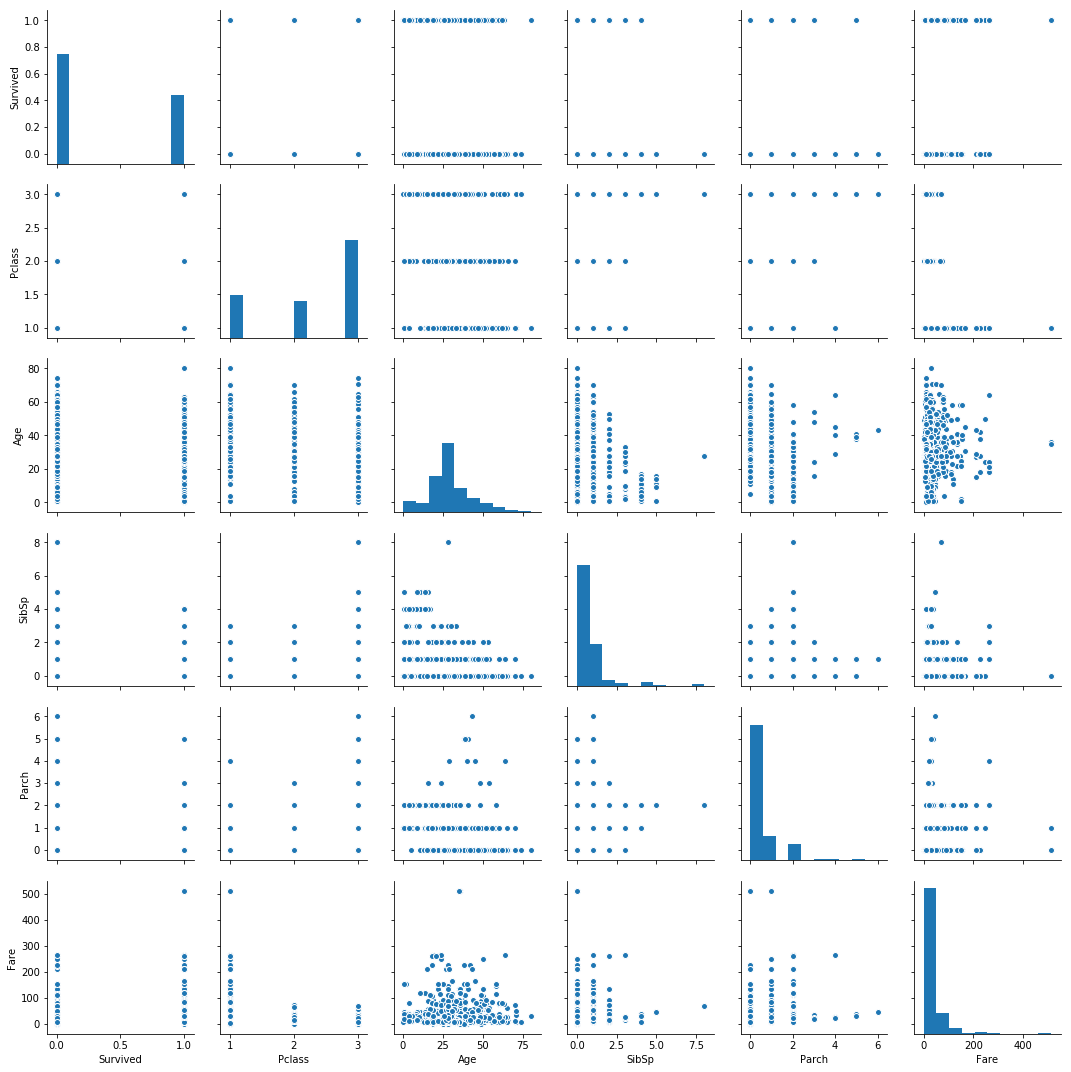

In [16]:
sb.pairplot(titanic_def)

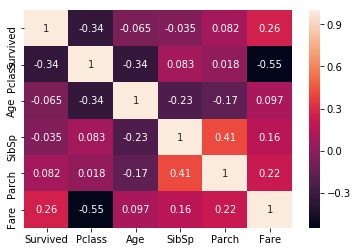

In [18]:
sb.heatmap(titanic_def.corr(),annot=True)

## Data Preprocessing

In [22]:
titanic_def['Sex'] = titanic_def['Sex'].astype('category').cat.codes

In [23]:
titanic_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int8
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 42.7 KB


In [24]:
target = titanic_def['Survived']
titanic_def_feat = titanic_def.drop('Survived',axis=1)
stdscaler = preprocessing.StandardScaler()
titanic_def_stdscal = stdscaler.fit_transform(titanic_def_feat)

## Test and Train Data Set

In [25]:
X_train,X_test,y_train,y_test =  train_test_split(titanic_def_stdscal,target,test_size=0.3,random_state=101)

## Creating and Training the Model


In [133]:
# Training Model using GridSearch
param_grid = {'criterion':('gini','entropy'),'max_depth':[2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[2,3,4,5,6,7],
             'max_features':[3,4,5,6]}
dectreeg =  DecisionTreeClassifier()
gscv = GridSearchCV(dectreeg,param_grid,cv=10,scoring='accuracy')

In [134]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7], 'max_features': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [125]:
# Single best score achieved across all params (min_samples_split)
print(gscv.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gscv.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gscv.best_estimator_)

-0.17335473515248795
{'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'max_leaf_nodes': 7}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=6, max_leaf_nodes=7, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [126]:
# Predict using the best esitmator using the Grid Search
dectreeg =  gscv.best_estimator_
predictedg = dectreeg.predict(X_test)

# calculate these metrics by for the Predicted and Test Data
print('MAE:', metrics.mean_absolute_error(y_test, predictedg))
print('MSE:', metrics.mean_squared_error(y_test, predictedg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictedg)))
print('Precision Score  {:2f}'.format(precision_score(y_test,predictedg)))
print('Recall Score  {:2f}'.format(recall_score(y_test,predictedg)))
print('F1 Score {:2f}'.format(f1_score(y_test,predictedg)))

MAE: 0.2126865671641791
MSE: 0.2126865671641791
RMSE: 0.4611795389695635
Precision Score  0.813187
Recall Score  0.649123
F1 Score 0.721951


In [127]:
accuracy =  metrics.accuracy_score(y_test,predictedg)
print('Accuracy score: {:2f}'.format(accuracy))

Accuracy score: 0.787313


Text(0,0.5,'Predicted Y')

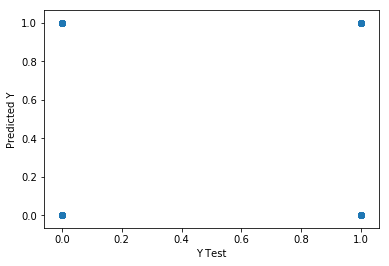

In [128]:
plt.scatter(y_test,predictedg)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Model Evaluation using Cross Validation

In [129]:
# Model Metrics using Gini Method
predictions = np.where(cross_val_predict(dectreeg, X_test, y_test, cv=10) >= 0.1,1,0)
#predictions = cross_val_predict(dectreeg, X_test, y_test, cv=10) 
print(confusion_matrix(y_test, predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))
print('F1 Score {:2f}'.format(f1_score(y_test,predictions)))

[[123  31]
 [ 35  79]]
0.7181818181818181
0.6929824561403509
F1 Score 0.705357


In [130]:
accuracy =  metrics.accuracy_score(y_test,predictions)
print('Accuracy score: {:2f}'.format(accuracy))

Accuracy score: 0.753731


In [131]:
fprcg,tprcg,treshholdcg = roc_curve(y_test,predictions)

In [132]:
fprcg,tprcg,treshholdcg

(array([0.       , 0.2012987, 1.       ]),
 array([0.        , 0.69298246, 1.        ]),
 array([2, 1, 0]))

In [121]:
fprg,tprg,treshholdg = roc_curve(y_test,predictedg)

In [122]:
fprg,tprg,treshholdg

(array([0.        , 0.11038961, 1.        ]),
 array([0.        , 0.64912281, 1.        ]),
 array([2, 1, 0], dtype=int64))

## Based on Threshold any changes to the value has no impact to the Overall score.